In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web

ImportError: cannot import name 'is_list_like'

In [ ]:
def get_historical_closes(ticker, start_date, end_date=None):
    closes = web.YahooDailyReader(ticker, start_date, end_date).read()
    return pd.DataFrame(closes.loc[:, 'Adj Close'])

ticker = 'AAPL'
start_date = '2017-01-01'
end_date = '2017-12-31'
closes = get_historical_closes(ticker, start_date, end_date)

closes.columns = ['AAPL']
closes

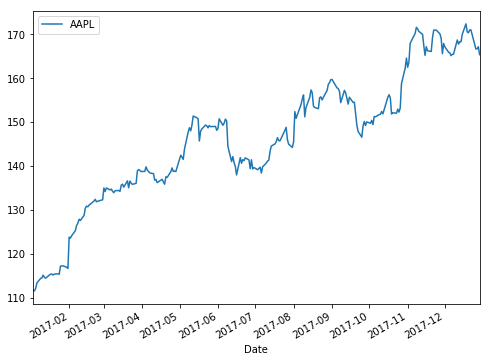

In [3]:
closes.plot(figsize=(8,6));

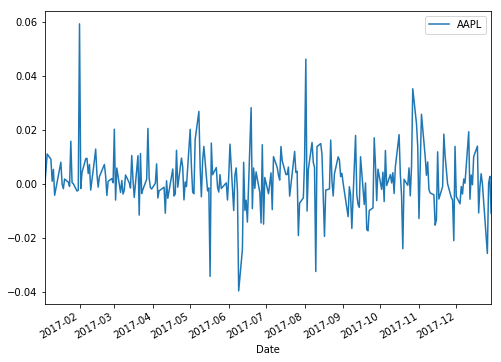

In [4]:
def calc_daily_returns(closes):
    return np.log(closes/closes.shift(1)).dropna()
daily_returns = calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [5]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]

def daily_ret_sim(mu, sigma, ndays, ntraj, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(sigma*np.random.randn(ndays, ntraj)+mu, index = dates)

ndays = 360
ntraj = 100
start_date = '2017-01-01'
simret = daily_ret_sim(mu, sigma, ndays, ntraj, start_date)

simret

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2017-01-01,0.012672,0.005293,-0.029527,0.001440,-0.016323,-0.003094,-0.000495,-0.021391,0.006822,-0.010267,...,-0.004872,-0.011921,0.002791,-0.011367,0.009653,-0.001713,0.006157,0.003268,-0.006506,-0.011560
2017-01-02,0.000785,-0.003673,0.026752,0.016103,0.009227,0.016905,-0.002113,0.002798,0.007361,-0.001697,...,0.020482,0.005367,0.006913,0.013509,0.000013,-0.007890,-0.013187,-0.007256,0.007946,-0.020447
2017-01-03,-0.005294,0.006193,-0.000940,0.023013,0.017684,0.011381,-0.006805,0.018236,0.007588,0.007648,...,-0.004434,-0.017596,0.000924,0.000646,0.000899,0.013887,-0.013816,0.002939,-0.006157,0.003875
2017-01-04,0.012505,-0.001236,-0.003763,0.001624,0.015176,-0.006166,0.003658,0.015598,0.009826,-0.006830,...,0.003139,-0.011153,0.013816,0.000126,-0.002311,0.005622,0.007785,-0.004435,0.002853,0.008043
2017-01-05,0.010172,-0.005905,-0.000414,-0.016899,0.013083,0.008973,-0.013284,0.018908,-0.012269,0.003544,...,0.009012,-0.002609,-0.012433,-0.001366,0.006543,0.000780,0.008426,0.003484,-0.000561,-0.009476
2017-01-06,0.009373,0.012592,-0.020534,-0.017046,0.002611,0.019101,-0.010468,-0.013903,0.003072,-0.006015,...,0.018856,0.005673,-0.010743,-0.017629,-0.006543,-0.006757,0.005568,0.005263,0.005072,0.001359
2017-01-07,0.002975,-0.005771,0.017527,-0.000851,0.004917,0.014641,0.001069,-0.008731,0.004071,0.008188,...,-0.011897,-0.008312,0.011332,0.014146,0.015840,0.028642,0.012970,0.016757,0.005578,0.001329
2017-01-08,0.018685,-0.003522,-0.001677,0.008317,0.005185,-0.003067,-0.000536,-0.009219,-0.015994,-0.016265,...,0.019094,-0.009922,-0.010525,-0.012485,0.001348,0.003035,0.005072,-0.003595,0.010779,0.008319
2017-01-09,0.019029,-0.007290,0.014122,-0.011334,-0.006305,-0.009823,0.003590,-0.004352,0.000462,-0.014711,...,0.013376,0.021326,-0.007187,0.007819,-0.016895,-0.007328,-0.008440,0.004929,0.004226,-0.012007
2017-01-10,0.003493,-0.007750,0.007099,0.009188,0.018526,-0.002003,0.000148,-0.002841,0.002826,0.005130,...,0.000217,-0.006303,0.013282,-0.004055,0.016034,-0.006387,0.001425,-0.002984,-0.004556,-0.006578


In [6]:
simdata=(closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())
simdata

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2017-01-01,167.486977,166.255717,160.566307,165.616393,162.700516,164.867068,165.296175,161.877917,166.510149,163.688746,...,164.574280,163.418250,165.840166,163.508769,166.982079,165.094979,166.399365,165.919427,164.305589,163.477224
2017-01-02,167.618499,165.646200,164.919768,168.304968,164.208680,167.677844,164.947286,162.331437,167.740325,163.411282,...,167.979841,164.297736,166.990581,165.732599,166.984207,163.797496,164.219470,164.719935,165.616422,160.168503
2017-01-03,166.733494,166.675219,164.764868,172.223096,167.138318,169.597067,163.828684,165.318893,169.017997,164.665898,...,167.236683,161.431963,167.144919,165.839734,167.134361,166.087971,161.966137,165.204729,164.599794,160.790425
2017-01-04,168.831585,166.469277,164.146103,172.503026,169.694200,168.554627,164.429089,167.917783,170.686937,163.545107,...,167.762392,159.641509,169.470269,165.860552,166.748604,167.024330,163.231966,164.473664,165.070035,162.088857
2017-01-05,170.557768,165.489158,164.078117,169.612358,171.928889,170.073868,162.259227,171.123012,168.605540,164.125661,...,169.281148,159.225492,167.376208,165.634190,167.843244,167.154718,164.613251,165.047609,164.977437,160.560152
2017-01-06,172.163942,167.586233,160.743305,166.745695,172.378398,173.353707,160.569614,168.760299,169.124353,163.141386,...,172.503428,160.131271,165.587639,162.739776,166.748656,166.029017,165.532384,165.918593,165.816258,160.778483
2017-01-07,172.676942,166.621866,163.585546,166.603813,173.228076,175.910417,160.741278,167.293329,169.814340,164.482602,...,170.463378,158.805723,167.474831,165.058252,169.410929,170.853146,167.693258,168.722353,166.743700,160.992261
2017-01-08,175.933774,166.036014,163.311430,167.995188,174.128523,175.371794,160.655173,165.758148,167.119982,161.828860,...,173.749563,157.237796,165.721434,163.010295,169.639449,171.372525,168.545890,168.116819,168.550731,162.337197
2017-01-09,179.313669,164.830054,165.634022,166.101907,173.034080,173.657623,161.233040,165.038407,167.197247,159.465568,...,176.089202,160.627060,164.534606,164.289862,166.797385,170.121350,167.129398,168.947501,169.264510,160.399605
2017-01-10,179.941072,163.557555,166.813999,167.635140,176.269604,173.310108,161.256932,164.570239,167.670440,160.285691,...,176.127409,159.617755,166.734586,163.624989,169.493426,169.038163,167.367782,168.444193,168.495175,159.347988


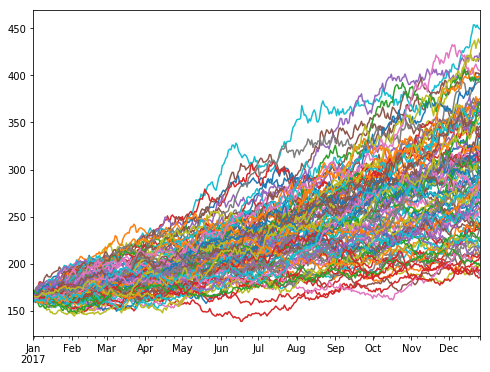

In [7]:
simdata.plot(figsize=(8,6),legend=False);

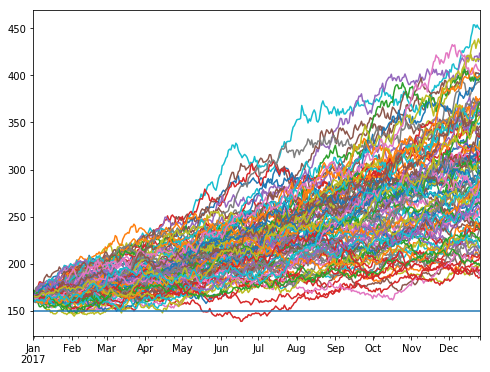

In [8]:
K = 150
dates = pd.date_range('20170101',periods=ndays)
strike = pd.DataFrame({'Strike':K*np.ones(ndays)},index=dates)
simul = pd.concat([simdata.T,strike.T]).T
simul.plot(figsize=(8,6),legend=False);

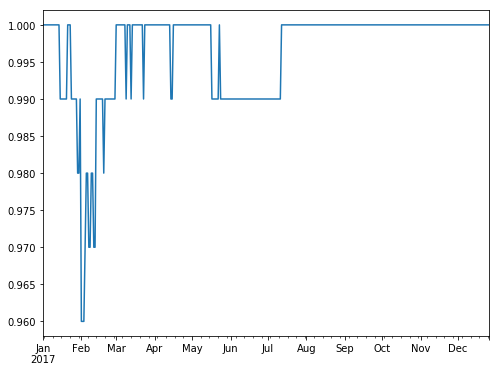

In [9]:
strike = pd.DataFrame(K*np.ones((ndays,ntraj)),index=dates)
count = simdata>strike
prob = count.T.sum()/ntraj
prob.plot(figsize=(8,6),legend=False);

In [10]:
closes.iloc[-1]

AAPL    165.378021
Name: 2017-12-29 00:00:00, dtype: float64

Apple tiene mayor probabilidad de darnos un interes deseado